<a href="https://colab.research.google.com/github/noor60/Artificial-Neural-Network/blob/main/ANN_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


multiclass classification

In [ ]:
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #this returns two tuple

In [ ]:
x_train.shape

(60000, 28, 28)

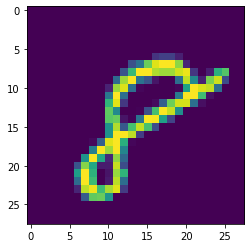

In [ ]:
plt.imshow(x_train[-1])

In [ ]:
print(x_train[-1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  38  48
   48  22   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  62  97 198 243 254
  254 212  27   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  67 172 254 25

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis =1)

x_test = tf.keras.utils.normalize(x_test, axis =1)


In [ ]:
print(x_train[-1])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))

#info about the parameter choosing https://machinelearningmastery.com/choose-an-activation-function-for-deep-learning/#:~:text=for%20Output%20Layers-,Activation%20Functions,a%20layer%20of%20the%20network.

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])
#parameter info https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6#:~:text=Optimizers%20are%20algorithms%20or%20methods,order%20to%20reduce%20the%20losses.&text=How%20you%20should%20change%20your,by%20the%20optimizers%20you%20use.
#https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2588 - accuracy: 0.9243
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1065 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0720 - accuracy: 0.9772


In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0925 - accuracy: 0.9692


[0.0925401821732521, 0.9692000150680542]

In [ ]:
model.save('mnist_ann.model')

INFO:tensorflow:Assets written to: mnist_ann.model/assets


In [ ]:
model1 = tf.keras.models.load_model('mnist_ann.model')

In [ ]:
prediction = model1.predict([x_test])

In [ ]:
import numpy as np


In [ ]:
print(np.argmax(prediction[2]))

1


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <a list of 10 Patch objects>)

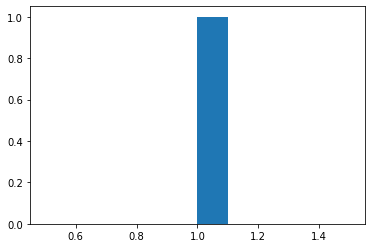

In [ ]:
plt.hist(np.argmax(prediction[2]))

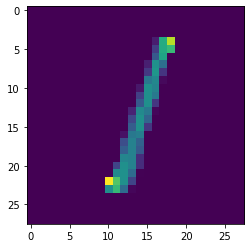

In [ ]:
plt.imshow(x_test[2])
plt.show()

# **another way of tackling this problem**


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#save some data for val also
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [ ]:
print(x_val.shape)
print(x_train.shape)
print(x_test.shape)

(10000, 28, 28)
(40000, 28, 28)
(10000, 28, 28)


In [ ]:
#build a model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:

model.compile(
    optimizer=keras.optimizers.RMSprop(),  # Optimizer
    # Loss function to minimize
    loss=keras.losses.SparseCategoricalCrossentropy(),
    # List of metrics to monitor
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

In [ ]:
print("Fit model on training data")
history = model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=2,
    # We pass some validation for
    # monitoring validation loss and metrics
    # at the end of each epoch
    validation_data=(x_val, y_val),
)

Fit model on training data
Epoch 1/2
625/625 [==============================] - 6s 9ms/step - loss: 0.0745 - sparse_categorical_accuracy: 0.9781 - val_loss: 0.1296 - val_sparse_categorical_accuracy: 0.9636
Epoch 2/2
625/625 [==============================] - 3s 6ms/step - loss: 0.0605 - sparse_categorical_accuracy: 0.9829 - val_loss: 0.1322 - val_sparse_categorical_accuracy: 0.9647


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape:", predictions.shape)

Evaluate on test data
79/79 [==============================] - 0s 4ms/step - loss: 0.0994 - sparse_categorical_accuracy: 0.9742
test loss, test acc: [0.09937889128923416, 0.9742000102996826]
Generate predictions for 3 samples
predictions shape: (3, 10)


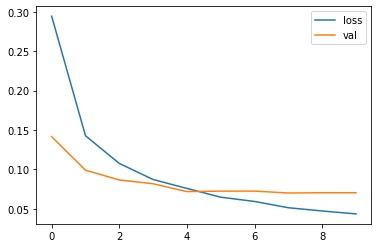

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val')
plt.legend()

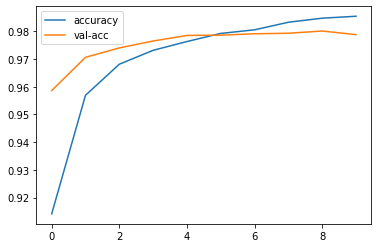

In [ ]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val-acc')
plt.legend()